# <center>Introduction to Data Science</center> 
### <center>Naive Bayes Dataset 1</center>
### <center>Patient Treatment</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
Based on either the treatment/procedures, lab results or the condition of a patient, medical facility decides whether the patient needs to be assigned either as Inpatient or Outpatient. Inpatient care requires patient to stay at the medical facility for atleast a night while patient receiving outpatient cares needs not to spend a night. 
The dataset contains records of various laboratory test results, age and gender of several patients and determines if the patient needs to be admitted to the medical facility or not. 

#### Objective
**With the help of this dataset we would like to find the correlation between the dependent variables and independent variables [SOURCE].**

#### About the Dataset
This dataset is being used from the Kaggle website and the URL to the dataset is: [Patient Treatment](https://www.kaggle.com/manishkc06/patient-treatment-classification)

It has 11 fields and the description of each field of the dataset are: 
1. **HAEMATOCRIT** - Laboratory test result of haematocrit (measures the ratio of the volume of red blood cells to the total volume of blood)
2. **HAEMOGLOBINS** - Laboratory test result of haemoglobins (measures the iron-containing protein in blood that is essential for oxygen transport)
3. **ERYTHROCYTE** - Laboratory test result of erythrocyte (measures the degree of inflammation present in the body)
4. **LEUCOCYTE** - Laboratory test result of leucocyte (measures the level of leukocytes, or white blood cells)
5. **THROMBOCYTE** - Laboratory test result of thrombocyte (measures the number of platelets in your blood)
6. **MCH** - Laboratory test result of MCH (measures the average amount in each of the red blood cells of a protein which carries oxygen around your body)
7. **MCHC** - Laboratory test result of MCHC (measures the average amount of hemoglobin in a group of red blood cells)
8. **MCV** - Laboratory test result of MCV (measures the average size of your red blood cells)
9. **AGE** - Age of the patient 
10. **SEX** - Gender of the patient 
11. **SOURCE** - Inpatient care or Outpatient care (1=Inpatient, 0=Outpatient)

In [1]:
# All the required libraries are imported here.
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#Describing the size, shape and dimension of the dataset.
patient_data = pd.read_csv('patient_treatment.csv') 
print("The total size of the dataset is {} bytes.".format(patient_data.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(patient_data.shape[0], patient_data.shape[1], patient_data.shape))
print("The dataset has a {} dimensional structure.".format(patient_data.ndim))

The total size of the dataset is 36399 bytes.
There are 3309 number of records and 11 number of fields with a (3309, 11) shape.
The dataset has a 2 dimensional structure.


In [3]:
print("The top 5 records of the dataset are: \n{}".format(patient_data.head()))

The top 5 records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0  


In [4]:
#Replacing the values F as 1 and M as 1 in the sex field of the dataset. 
#The conversion is required to be able to scale the data within a given range.

patient_data['SEX'] = patient_data['SEX'].replace(['F', 'M'], [1, 0])
print("The top 5 updated records of the dataset are: \n{}".format(patient_data.head()))

The top 5 updated records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE  SEX  SOURCE  
0  80.9   33    1       1  
1  65.0   36    0       0  
2  93.9   70    1       0  
3  89.7   18    1       0  
4  83.7   36    0       0  


In [5]:
#Printing the data types
print("The datatype of the dataset are: \n{}".format(patient_data.dtypes))

The datatype of the dataset are: 
HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX               int64
SOURCE            int64
dtype: object


In [6]:
#Statistical description of the data
print(patient_data.describe().T)

               count        mean         std    min     25%     50%     75%  \
HAEMATOCRIT   3309.0   38.226111    5.971943  13.70   34.30   38.70   42.50   
HAEMOGLOBINS  3309.0   12.749350    2.084325   3.80   11.40   12.90   14.20   
ERYTHROCYTE   3309.0    4.544802    0.784510   1.48    4.04    4.58    5.06   
LEUCOCYTE     3309.0    8.715533    4.991299   1.10    5.70    7.60   10.30   
THROMBOCYTE   3309.0  258.893019  112.676139  10.00  191.00  257.00  322.00   
MCH           3309.0   28.230039    2.696520  14.90   27.20   28.70   29.80   
MCHC          3309.0   33.336476    1.247055  26.00   32.70   33.40   34.10   
MCV           3309.0   84.611333    6.916079  54.00   81.50   85.30   88.80   
AGE           3309.0   46.644303   21.874106   1.00   29.00   48.00   64.00   
SEX           3309.0    0.473255    0.499360   0.00    0.00    0.00    1.00   
SOURCE        3309.0    0.398005    0.489561   0.00    0.00    0.00    1.00   

                  max  
HAEMATOCRIT     69.00  
HAE

### Statistical Numerical and Graphical Summaries

The scatter matrix can be constructed to display how the data are distributed across the dataset.



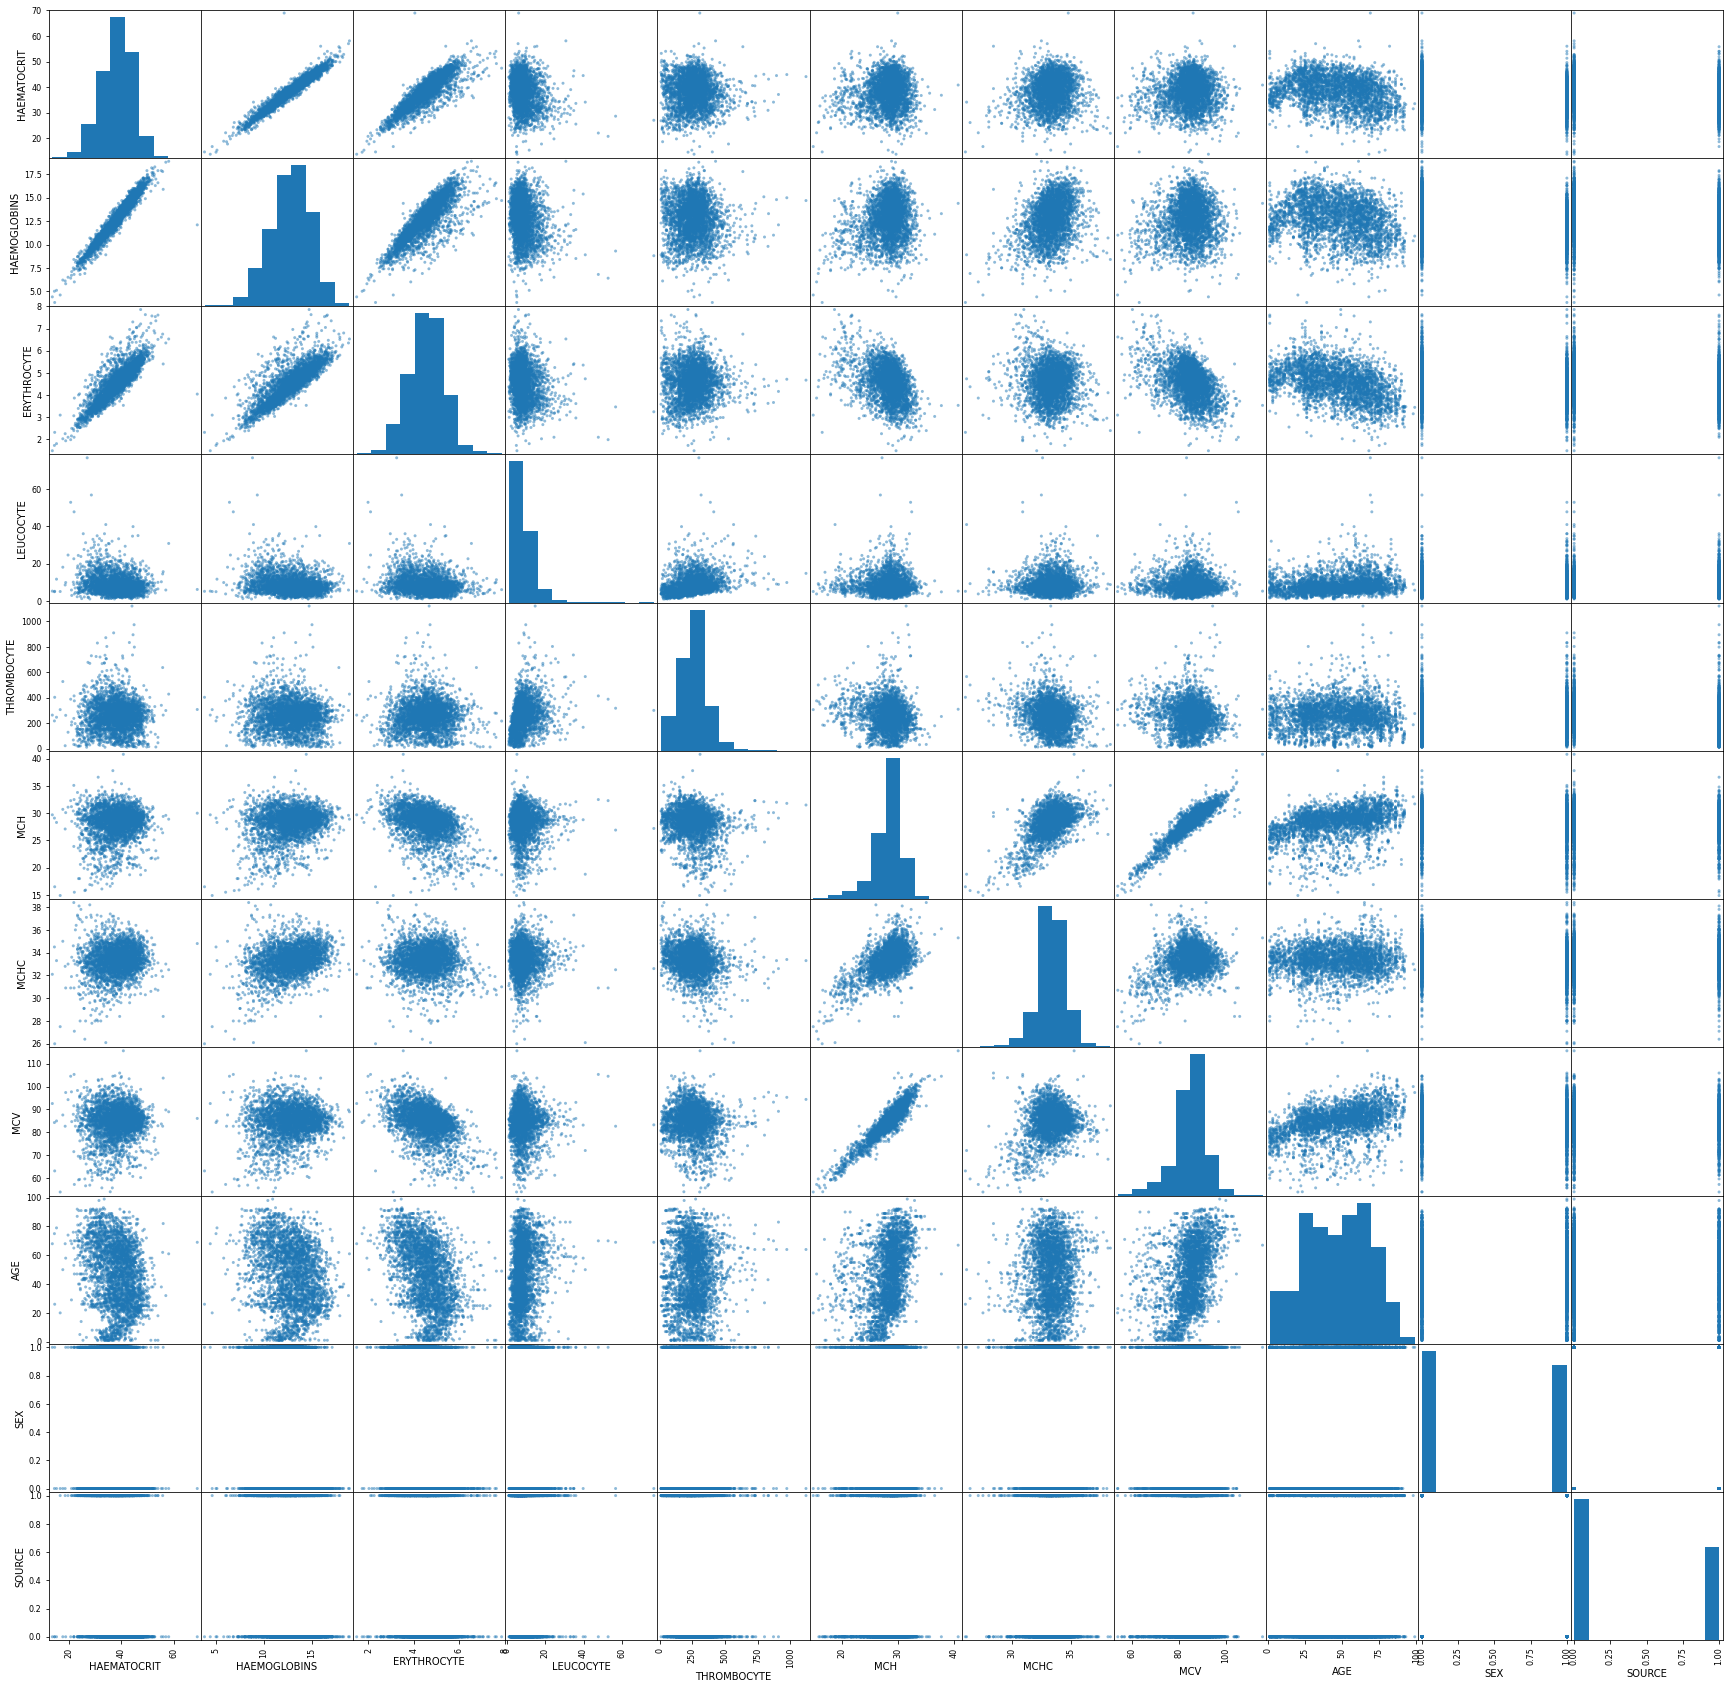

In [7]:
print("The scatter matrix can be constructed to display how the data are distributed across the dataset.\n")

_scatter_matrix_data = scatter_matrix(patient_data, figsize=(30,30), diagonal='hist')

The above scatter plot displays that few pairs of features show some correlation while others show weak or no correlation. By looking at the histograms on the diagonal, all the data looks to be normally skewed leaving few features which looks to be skewed a little. To find whether the skewness is present in our data, we can use the skew() function to display the skewness in our dataset. 

Here, we will display whether the features are skewed or not. 

In [8]:
for data_keys in patient_data.keys():
      skewness = patient_data[data_keys].skew()
      if skewness > 0: 
          print(data_keys, "is Right Skewed")
      elif skewness <0:
          print(data_keys, "is Left Skewed")
      else:
          print(data_keys, "is Normally Distributed")

HAEMATOCRIT is Left Skewed
HAEMOGLOBINS is Left Skewed
ERYTHROCYTE is Left Skewed
LEUCOCYTE is Right Skewed
THROMBOCYTE is Right Skewed
MCH is Left Skewed
MCHC is Left Skewed
MCV is Left Skewed
AGE is Left Skewed
SEX is Right Skewed
SOURCE is Right Skewed


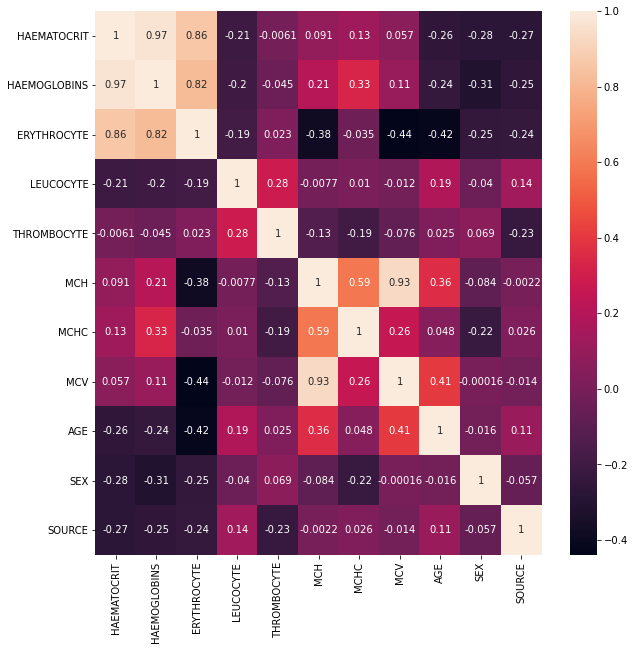

In [9]:
correlations = patient_data.corr()
plt.figure(figsize=(10,10))
heatmap_ = sns.heatmap(correlations, annot=True)

As seen in the scatter plot above, and comparing with the heatmap we can see that they both predicts the correlation between different variables. The heatmap shows us how well the correlation between the variables are created by providing us with a correlation coeffeicient value. 

The correlation is 1 for the diagonal since plotting the correlation of the same variables always gives out strong correlation. 

The heatmap highlights the pairs that have strong positive correlation with lighter color while the negative correlations are highlighted with darker colors. We can see that most of the features are weakly correlated while there are few with negative direction. 

### Algorithm Implementation and Statistical Tests 

In [10]:
#Considering all the features for classification. 
pred_var = patient_data.iloc[:, 0:10]
targ_var = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25)

#Using the MinMaxScaler since our data are skewed. 
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

nb = BernoulliNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("The accuracy score of the Bernoulli Naive Bayes is {}".format(nb.score(X_test, y_test) * 100))

The accuracy score of the Bernoulli Naive Bayes is 58.212560386473434


In [11]:
#Creating confusion matrix and classification report on the prediction.
y_pred = nb.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

Confusion Matrix:
      F  T
F  481  0
T  346  1
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       481
           1       1.00      0.00      0.01       347

    accuracy                           0.58       828
   macro avg       0.79      0.50      0.37       828
weighted avg       0.76      0.58      0.43       828



The Bernoulli Naive Bayes is often used for boolean/binary features, it could not provide better accuracy. The accuracy obtained is lower than KNN, Decision Trees and Neural Network.

The confusion matrix shows that the case for whether a patient is Inpatient could not be well classified. 

Now, we will try the Gaussian Naive Bayes to see the accuracy score obtained. 

In [12]:
#Considering all the features for classification. 
pred_var = patient_data.iloc[:, 0:10]
targ_var = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25)

#Using the MinMaxScaler since our data are skewed. 
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("The accuracy score of the Gaussian Naive Bayes is {}".format(nb.score(X_test, y_test) * 100))

The accuracy score of the Gaussian Naive Bayes is 68.35748792270532


In [13]:
#Creating confusion matrix and classification report on the prediction.
y_pred = nb.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

Confusion Matrix:
      F    T
F  424   77
T  185  142
              precision    recall  f1-score   support

           0       0.70      0.85      0.76       501
           1       0.65      0.43      0.52       327

    accuracy                           0.68       828
   macro avg       0.67      0.64      0.64       828
weighted avg       0.68      0.68      0.67       828



The accuracy score has improved by about 10 percent than the Bernoulli Naive Bayes' implementation.

The accuracy might improve by finding out the important features and using the Gaussian Naive Bayes' algorithm for classification. 

### Performance Improvement

Finding the top 5 important features for classification. 

In [14]:
#Considering all of the features to find the top features that helps to determine the Potability of the water.
X = patient_data.iloc[:, 0:10]
y = patient_data.iloc[:, -1]

select_k_best = SelectKBest(score_func=chi2, k=5)

best_result = select_k_best.fit(X, y)

scores = pd.DataFrame(best_result.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Field', 'Score']

print("Listing the top 5 features : \n{}".format(feature_scores.nlargest(5, 'Score')))

Listing the top 5 features : 
          Field        Score
4   THROMBOCYTE  8547.951143
8           AGE   437.092039
0   HAEMATOCRIT   228.922785
3     LEUCOCYTE   184.512253
1  HAEMOGLOBINS    73.270731


From, the above list of features we can see that Thrombocyte, Age, Haematocrit, Leucocyte and Haemoglobins are the top 5 features that are important. We will consider these features to see how well the algorithm does.

In [15]:
#Considering all the features for classification. 
pred_var = patient_data[['THROMBOCYTE', 'AGE', 'HAEMATOCRIT', 'LEUCOCYTE', 'HAEMOGLOBINS']]
targ_var = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25)

#Using the MinMaxScaler since our data are skewed. 
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("The accuracy score of the Gaussian Naive Bayes is {}".format(nb.score(X_test, y_test) * 100))

The accuracy score of the Gaussian Naive Bayes is 70.65217391304348


In [16]:
#Creating confusion matrix and classification report on the prediction.
y_pred = nb.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

Confusion Matrix:
      F    T
F  398   91
T  152  187
              precision    recall  f1-score   support

           0       0.72      0.81      0.77       489
           1       0.67      0.55      0.61       339

    accuracy                           0.71       828
   macro avg       0.70      0.68      0.69       828
weighted avg       0.70      0.71      0.70       828



The accuracy score is similar as to the previous implementation. Not much gain is obtained. We can use ExtraTreesClassifier ensemble to list top important features as well to see if there is any other top features that could be listed.

[0.11545847 0.10430942 0.1047036  0.10920005 0.18400758 0.08215916
 0.08875187 0.08680496 0.10405589 0.020549  ]


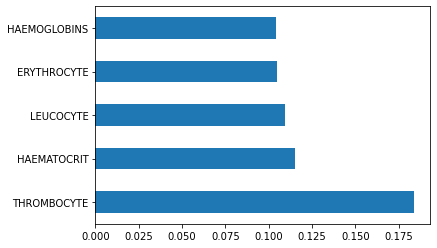

In [17]:
etc = ExtraTreesClassifier()

etc.fit(X,y)
print(etc.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(etc.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

The ExtraTreeClassifier has presented us with almost the same top 5 features with a single change with one new feature Erythrocyte replacing the Age feature. 

In [18]:
#Considering all the features for classification. 
pred_var = patient_data[['THROMBOCYTE', 'LEUCOCYTE', 'HAEMOGLOBINS', 'HAEMATOCRIT', 'ERYTHROCYTE']]
targ_var = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25)

#Using the MinMaxScaler since our data are skewed. 
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("The accuracy score of the Gaussian Naive Bayes is {}".format(nb.score(X_test, y_test) * 100))

The accuracy score of the Gaussian Naive Bayes is 70.41062801932367


In [19]:
#Creating confusion matrix and classification report on the prediction.
y_pred = nb.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

Confusion Matrix:
      F    T
F  412   91
T  154  171
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       503
           1       0.65      0.53      0.58       325

    accuracy                           0.70       828
   macro avg       0.69      0.67      0.68       828
weighted avg       0.70      0.70      0.70       828



These features does not provide any improvement to the accuracy score. Thus, we could use the previous top 5 features for classification using the Gaussian Naive Bayes' algorithm. 

### Conclusion

Thus, from the above implementation of the naive bayes we can conclude that high accuracy is not able to obtain. Prediction accuracy was not improved by the use of important features either. This could be due to the dataset we have is not as well prepared as required and there are lot of noises present in the data. Also, the confounding variables might play a factor needs to be adjusted. Also, as per the disadvantage of Naive Bayes' that it could not predict well given if an event has not occured could play a role in not being able to classify the dataset. 

| K-NN | Decision Tree | Neural Network | Naive Bayes' |
|--|--|--|--|
|74%|75%|73%|70%|

Looking at the table above we can see that Decision Tree provides better accuracy for this dataset. And, Naive Bayes' algorithm has the least accuracy score of all the algorithms implemented. <br/>
Also, we can note that since all the feature variables are numeric, the Bayes theorem might not have worked well in this case as the Bayes' theorem does not work well with too many numeric features.